Importing the relevant packages.
We require the following:
- numpy
- pandas
- matplotlib
- itertools

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy.random as npr

In [2]:
from itertools import permutations

In the next code block, the function $DefaultDistanceDataframe$ takes as input the parameter $n$ and returns a dataframe with $n$ rows and columns. The entry ${(i,j)}$ will represent the distance between each pair of cities $i$ and $j$, and the matrix is generated with default entries $(i,j) = 0$. We assume that all such dataframes for a network of $n$ cities will have an index set represented by $(1,...,n)$.

In [3]:
def DefaultDistanceDataframe(n):
    
    #Creating the nxn matrix with (i,j) == 0.
    graph = np.zeros((n,n))
    
    #Creating the labels for the cities. Each city i will be associated with index i. 
    node_labels = np.array(range(1,n+1))
    
    #Creating the resultant dataframe with the graph matrix and node_labels as the index.
    df = pd.DataFrame(graph, index=node_labels, columns=node_labels)
    return(df)  

For $n$ cities, the output of $DefaultDistanceDataframe$ has dimension $n^2$. This means that the matrix grows polynomially with the number of cities (it scales quadratically with n). Although polynomial growth is somewhat problematic to deal with, it pales in comparison to factorial growth. A factorial function will eventually surpass even exponential functions, although it may take a considerable amount of time to do so. This is where the real difficulty occurs when trying to solve the TSP, as the number of routes through a network of $n$ cities is determined by the number of permutations of those cities, which is given by $n!$.

/var/folders/5p/hzbf0zgn4kl1gq994543pg9m0000gn/T/ipykernel_75748/4221105278.py:7: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  y1.append(np.math.factorial(x1[i]))


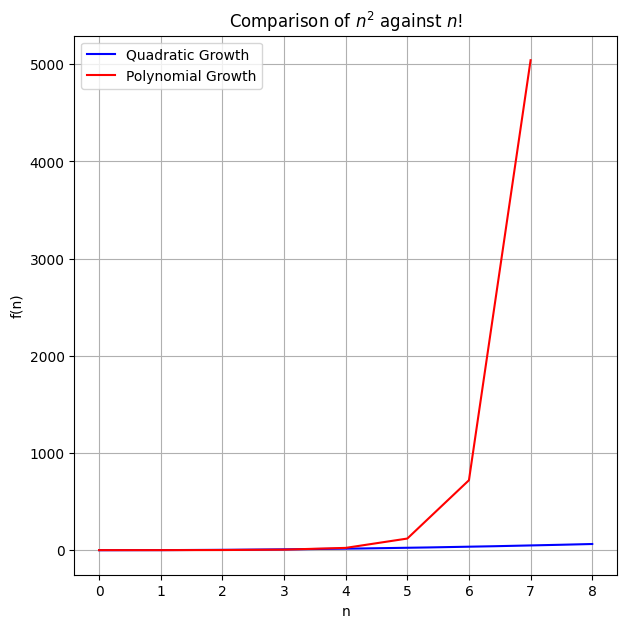

In [4]:
x = np.linspace(0, 8, 1000)
y = x ** 2

x1 = np.arange(0, 8)
y1 = []
for i in range(len(x1)):
    y1.append(np.math.factorial(x1[i]))

plt.figure(figsize=(7, 7))
plt.plot(x, y, label='Quadratic Growth', color='blue', linestyle='-')
plt.plot(x1, y1, label='Polynomial Growth', color='red', linestyle='-')
plt.xlabel('n')
plt.ylabel('f(n)')
plt.title('Comparison of $n^2$ against $n!$')
plt.legend()

plt.grid(True)
plt.show()

The function $CostofRoute$ takes as input a distance dataframe for cities $(1,...,n)$, such that the entry $(i,j)$ represents the distance between nodes $i$ and $j$, as well as an associated route through the network. It returns a list with the cost of traversing between each pair of nodes $(i,j)$ in the route and then the cost of traversing from the final node to the home node. The function $SumCost$ performs the function $CostofRoute$ and then returns the sum of the entries in the resultant array.

In [5]:
def CostofRoute(route, distance_dataframe):
    
    #Initializing route_cost as an empty array
    route_cost = []
    
    #Since we have specified that the (i,j) entry in the distance dataframe represents the distance between
    #cities i and j, we can determine the cost of traversing between the entries i and i+1 in the tour
    #by the [i, i+1] entry in the distance_dataframe
    
    #A route of size n has index set (0,...n-1), hence range((n-1)) considers the index set (0,...,n-2) for the route.
    #The following loop therefore calculates up the cost of traversing between each (route[i], route[i+1]) up to (route[n-2],route[n-1]).
    for i in range(len(route)-1):
        current_node = route[i]
        next_node = route[i+1]
        cost_between_nodes = distance_dataframe.loc[current_node, next_node]
        route_cost.append(cost_between_nodes)
        
    #Determing the cost to go from last node to home depot
    k = len(route)-1
    loop_back = distance_dataframe.loc[route[k], route[0]]
    route_cost.append(loop_back)
    
    return(route_cost)

def SumCost(route, distance_dataframe):
    route_cost = CostofRoute(route, distance_dataframe)
    total_cost = sum(route_cost)
    return total_cost

The function $OptimalRoute$ takes as input a distance dataframe as well as an associated collection of routes. It calculates by brute force the least costly route, and then returns the obtained route alongside its determined cost.

In [6]:
def OptimalRoute(collection_of_routes, distance_dataframe):
    
    #Initializing the cost vector as a string of 0s with size equal to the number of routes.
    costs = np.zeros(len(collection_of_routes))
    
    #Determines the cost of each route and then append it to the cost array.
    for i in range(len(collection_of_routes)):
        cost_of_route_i = SumCost(collection_of_routes[i], distance_dataframe)
        costs[i]= cost_of_route_i
    
    #There is a 1:1 correspondence between the collection_of_routes array and the costs array. Hence we can use argmin to 
    #determine the position of the optimal route.
    optimum_route_sum = np.min(costs)
    optimum_route = collection_of_routes[np.argmin(costs)]
    solution = (optimum_route_sum, optimum_route)
    
    return (solution)

We can now define the class $TSP$.

In [7]:
class TSP:
    def __init__(self):
        pass
    
    def createDataframe(self, n):
        dataframe = DefaultDistanceDataframe(n)
        return dataframe
    
    def generateRoutes(self, distance_dataframe, Restricted = False, depot = 1):
        if Restricted is False:
            routes = RouteGenerator(distance_dataframe)
        else:
            routes = RestrictedRouteGenerator(distance_dataframe, depot)    
        return routes
    
    def getCostofRoute(self, route, distance_dataframe):
        total_cost = SumCost(route, distance_dataframe)
        return total_cost
    
    def bestRoute(self, collection_of_routes, distance_dataframe):
        optimum = OptimalRoute(collection_of_routes, distance_dataframe)
        return optimum

### Testing

Let us test the functions defined in this file.

In [8]:
#Importing the distance dataframe for testing
columns = [i for i in range(1,26)]
distance_dataframe_test = pd.read_csv('distance_dataframes/dist_dataframe_normal_1_25_wo:9.csv',names = columns)
distance_dataframe_test = distance_dataframe_test.iloc[1:]

In [9]:
#Create a test route
route = []

for i in range(1, len(distance_dataframe_test.index)+1):
    route.append(i)

In [10]:
CostofRoute(route, distance_dataframe_test)

[0.14,
 0.41,
 0.34,
 0.74,
 0.73,
 0.67,
 0.58,
 0.26,
 0.69,
 0.38,
 0.06,
 0.45,
 0.39,
 0.51,
 0.2,
 0.53,
 0.54,
 0.62,
 0.78,
 0.58,
 0.41,
 0.21,
 0.11,
 0.53,
 0.56]

In [11]:
SumCost(route, distance_dataframe_test)

11.42